In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [6]:
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%
1.0


/Users/liamli/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

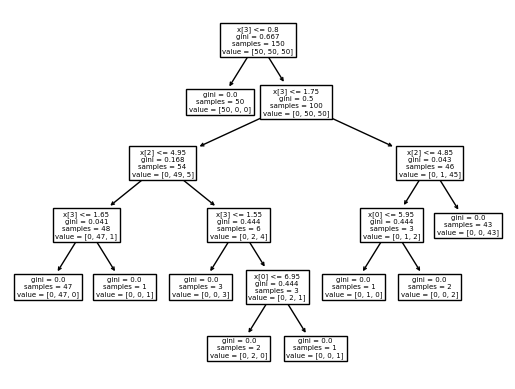

In [3]:
tree.plot_tree(clf)

/Users/liamli/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:59:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 500x500 with 0 Axes>

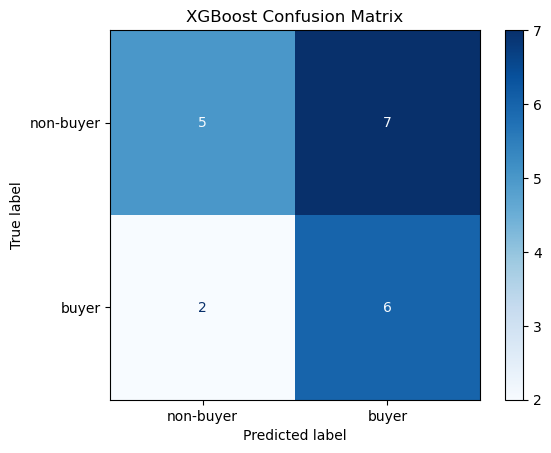

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.46      0.75      0.57         8

    accuracy                           0.55        20
   macro avg       0.59      0.58      0.55        20
weighted avg       0.61      0.55      0.54        20

XGBoost Accuracy: 0.55
XGBoost F1 Score: 0.5714285714285714


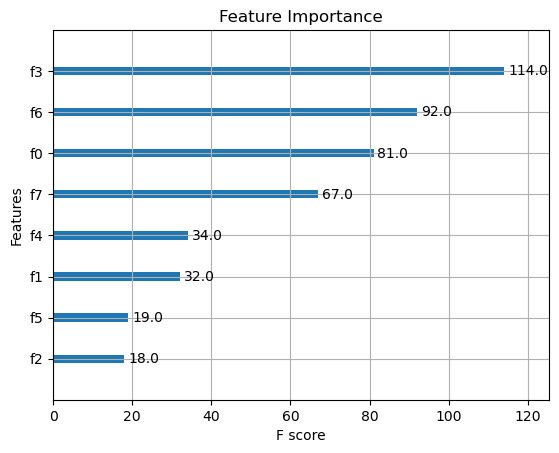

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
import xgboost as xgb

# Example dataset creation
data = {
    'X1': np.random.rand(100),
    'X2': np.random.randint(1, 10, 100),
    'X3': np.random.choice(['A', 'B', 'C'], 100),
    'X4': np.random.rand(100),
    'X5': np.random.randint(1, 10, 100),
    'X6': np.random.choice(['D', 'E', 'F'], 100),
    'X7': np.random.rand(100),
    'X8': np.random.randint(1, 10, 100),
    'Y': np.random.choice(['Yes', 'No'], 100)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Preprocess the data
label_encoder = LabelEncoder()
for column in ['X3', 'X6', 'Y']:
    df[column] = label_encoder.fit_transform(df[column])

# Split the data into features and target
X = df.drop('Y', axis=1)
y = df['Y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', 
                                   use_label_encoder=False, 
                                   eval_metric='logloss')

# Train the model
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions
xgb_pred = xgb_classifier.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non-buyer', 'buyer'])

# Adjust the figure size to make the confusion matrix smaller
plt.figure(figsize=(5, 5))  # Adjust the size as needed
disp.plot(cmap='Blues', values_format='d')  # You can also adjust cmap and values_format if needed

plt.title('XGBoost Confusion Matrix')
plt.show()

# Classification Report and Accuracy
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

# Calculate F1 Score
f1 = f1_score(y_test, xgb_pred)
print("XGBoost F1 Score:", f1)

# Plot feature importance
xgb.plot_importance(xgb_classifier)
plt.title('Feature Importance')
plt.show()


/Users/liamli/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:02:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


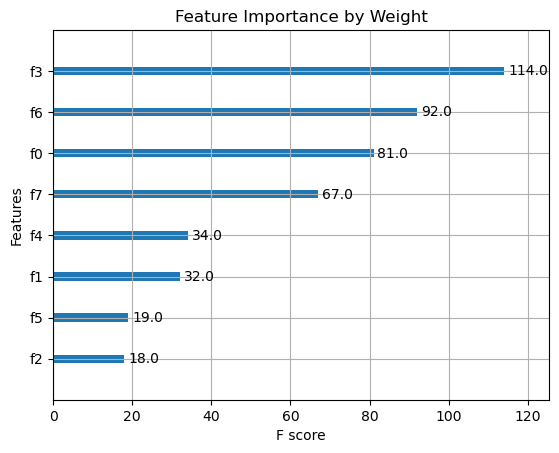

In [24]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming the model has been trained with X_train_scaled and y_train
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train_scaled, y_train)

# Plot feature importance using default "weight" metric
xgb.plot_importance(xgb_classifier)
plt.title('Feature Importance by Weight')
plt.show()